In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.metrics import F1Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Chargement des données

In [140]:
mnist = mnist.load_data()

In [141]:
# Chargement des données MNIST : Les données sont déjà divisées en ensembles d'entraînement et de test et sont prêtes à être utilisées. 
# Les images sont de taille 28x28 pixels et les étiquettes sont des chiffres de 0 à 9.

(X_train, y_train), (X_test, y_test) = mnist 

In [142]:
# Taille des données
print("Taille des données d'entraînement :", X_train.shape, y_train.shape) 
print("Taille des données de test :", X_test.shape, y_test.shape)

Taille des données d'entraînement : (60000, 28, 28) (60000,)
Taille des données de test : (10000, 28, 28) (10000,)


In [143]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

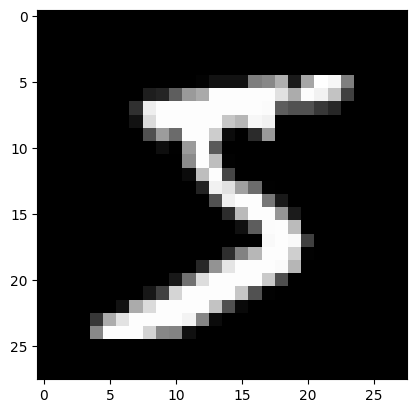

In [144]:
# voir image x_train[0] avec matplotlib
plt.imshow(X_train[0], cmap='gray')

### Normalisation des données

In [145]:
# Normalisation des données entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [146]:
X_train[0][15:20, 15:20]


array([[0.7294118 , 0.99215686, 0.99215686, 0.5882353 , 0.10588235],
       [0.0627451 , 0.3647059 , 0.9882353 , 0.99215686, 0.73333335],
       [0.        , 0.        , 0.9764706 , 0.99215686, 0.9764706 ],
       [0.50980395, 0.7176471 , 0.99215686, 0.99215686, 0.8117647 ],
       [0.99215686, 0.99215686, 0.99215686, 0.98039216, 0.7137255 ]],
      dtype=float32)

In [147]:
# Redimensionnement des données pour les adapter à l'entrée du modèle
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [148]:
# Conversion des étiquettes en format catégoriel
y_train = to_categorical(y_train, num_classes=10) # que 
y_test = to_categorical(y_test, num_classes=10)

Label de l'image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


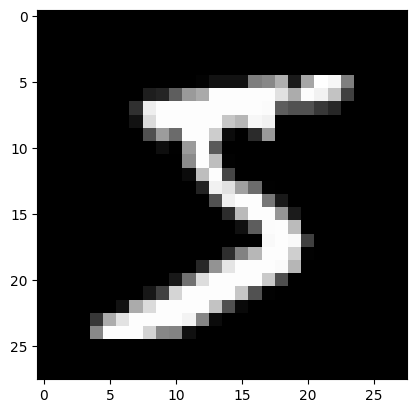

In [149]:
# Tracer la 1ere image de l'ensemble d'entraînement
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
print("Label de l'image :", y_train[0])  # Affiche le label de l'image

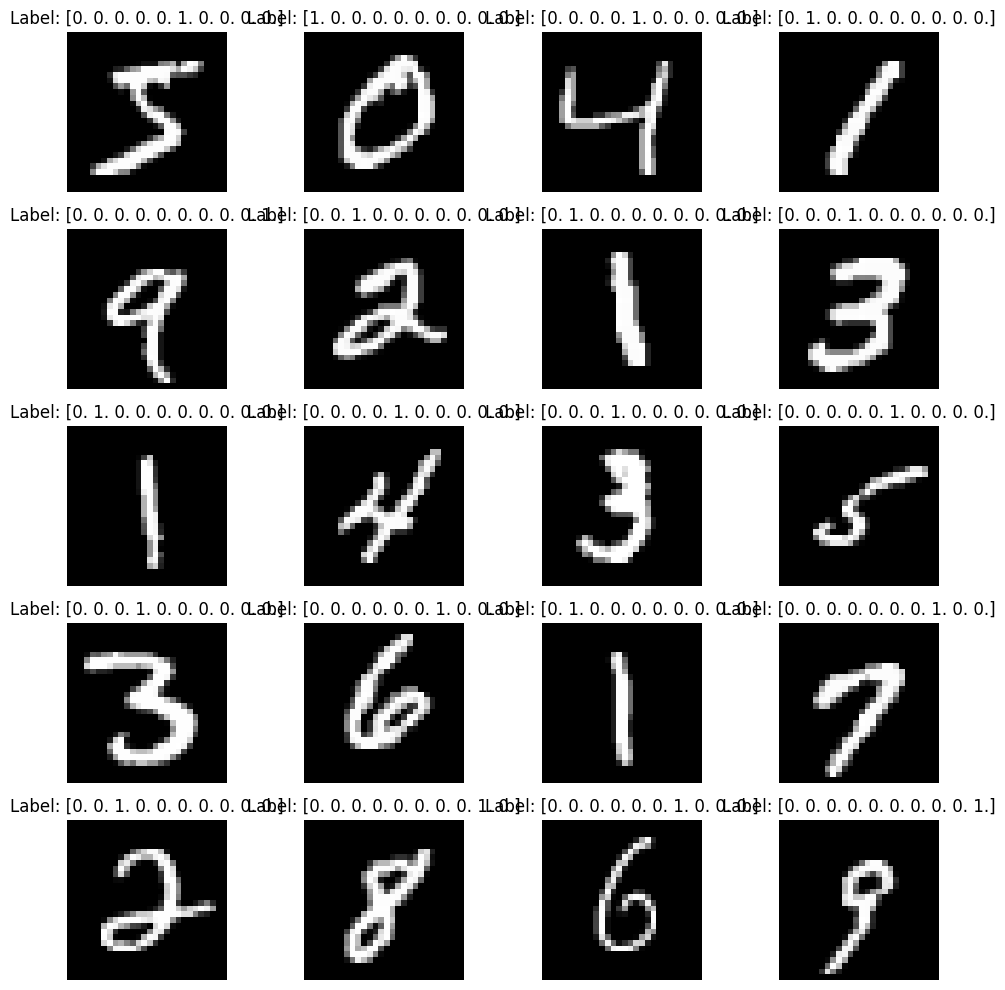

In [150]:
sample = 20
images = X_train[:sample]
fig = plt.figure(figsize=(10, 10))
for i in range(sample):
    ax = fig.add_subplot(5, 4, i + 1)
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [151]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),  # Couche d'entrée
        Flatten(),  # Aplatit les données
        Dense(128, activation='relu'),  # Couche dense avec 128 neurones et activation ReLU
        Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones et activation softmax
    ]
)

In [152]:
model.summary()  # Affiche le résumé du modèle

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model.compile(
    loss='categorical_crossentropy',  # Fonction de perte pour la classification multi-classe
    optimizer='adam',  # Optimiseur Adam
    metrics=['accuracy']  # Métriques pour évaluer le modèle (précision)
)

### Ajustement du modele

In [154]:
# Ajustement du modèle
mymodel = model.fit(
    X_train, y_train,  # Données d'entraînement et étiquettes
    epochs=20,  # Nombre d'époques pour l'entraînement
    batch_size=600,  # Taille du lot pour l'entraînement
    verbose=1,  # Affiche les informations d'entraînement
    validation_split=0.2  # Fraction des données d'entraînement à utiliser pour la validation
)   

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6888 - loss: 1.1316 - val_accuracy: 0.9184 - val_loss: 0.3004
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9179 - loss: 0.2983 - val_accuracy: 0.9354 - val_loss: 0.2350
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9363 - loss: 0.2310 - val_accuracy: 0.9448 - val_loss: 0.1988
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9458 - loss: 0.1951 - val_accuracy: 0.9498 - val_loss: 0.1775
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9522 - loss: 0.1674 - val_accuracy: 0.9555 - val_loss: 0.1602
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9590 - loss: 0.1429 - val_accuracy: 0.9595 - val_loss: 0.1439
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.1256 - val_accuracy: 0.9627 - val_loss: 0.1348
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9677 - loss: 0.1149 - val_accuracy: 0.9640 - val_loss:

### Prédire les données de test

In [155]:
y_test_pred = model.predict(X_test)  # Prédictions sur l'ensemble de test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


In [156]:
pd.DataFrame(y_test_pred).head().round(2)  # Affiche les premières prédictions arrondies à 2 décimales

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.00
1,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.99,0.0,0.0,0.0,0.0,0.01


In [157]:
mysample = 0

print(y_test[mysample])  # Affiche l'étiquette réelle de l'échantillon
np.argmax(y_test_pred[mysample])  # Affiche l'étiquette prédite par le modèle


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


np.int64(7)

Text(0.5, 1.0, 'Label: 7, Predicted: 7')

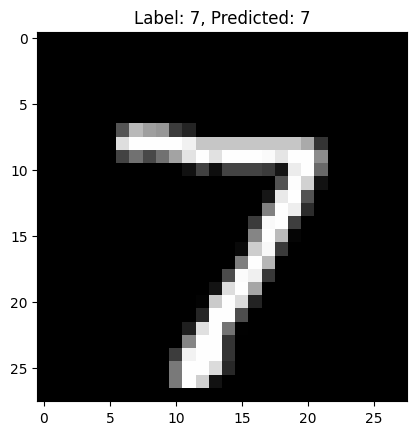

In [158]:
plt.imshow(X_test[mysample].reshape(28, 28), cmap='gray')  # Affiche l'image de l'échantillon
plt.title(f"Label: {np.argmax(y_test[mysample])}, Predicted: {np.argmax(y_test_pred[mysample])}")  # Affiche le label réel et la prédiction

#### Transformation les probabilités en modalité la plus vraisemblable

In [159]:
y_test_class = np.argmax(y_test, axis=1)  # Convertit les étiquettes de test en classes
y_test_pred_class = np.argmax(y_test_pred, axis=1)  # Convertit les prédictions en classes

In [160]:
res = pd.concat(
    [pd.DataFrame(y_test_class, columns=['Y']),
     pd.DataFrame(y_test_pred_class, columns=['Ypred'])],
    axis=1
)
res

,Y,Ypred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


### Evaluation du modèle

In [161]:
# evaluation du modèle
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_test_pred_class))  # Affiche le rapport de classification
print(confusion_matrix(y_test_class, y_test_pred_class))  # Affiche la matrice de confusion

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 972    0    3    2    1    0    0    1    1    0]
 [   0 1124    4    0    0    1    2    1    3    0]
 [   5    1 1010    3    1    0    2    4    5    1]
 [   0    0    9  981    0    6    1    5    6    2]
 [   3    0    5    1  948   

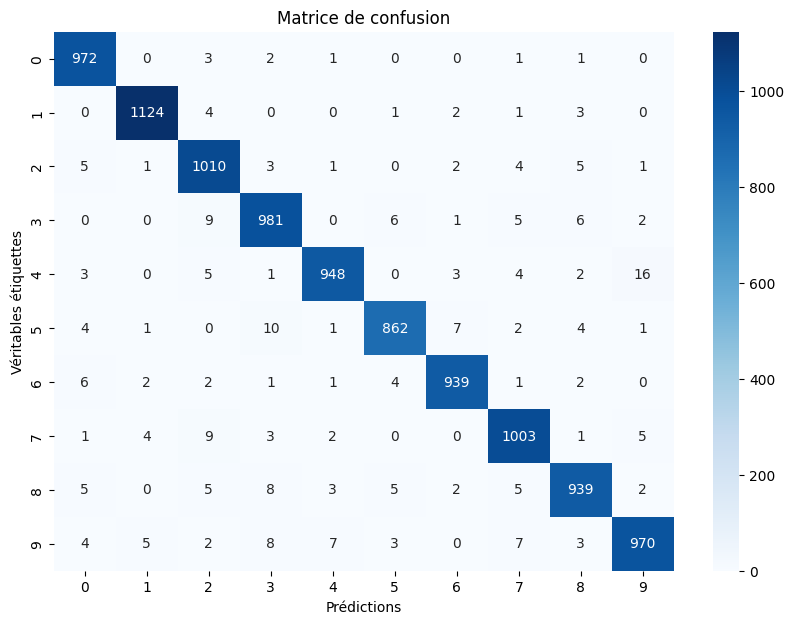

In [162]:
# Tracer la matrice de confusion
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_class, y_test_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.show()


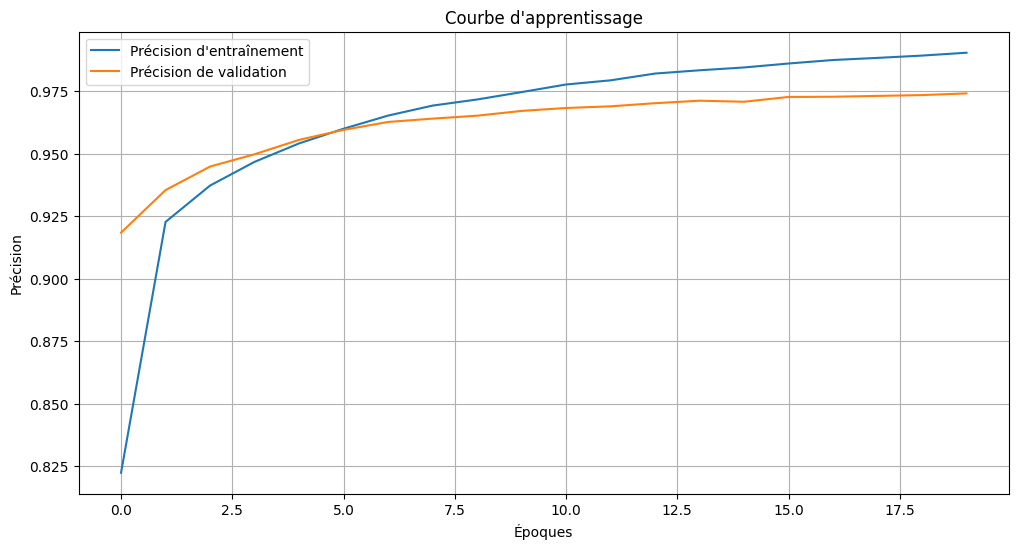

In [163]:
# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 6))
plt.plot(mymodel.history['accuracy'], label='Précision d\'entraînement')
plt.plot(mymodel.history['val_accuracy'], label='Précision de validation')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

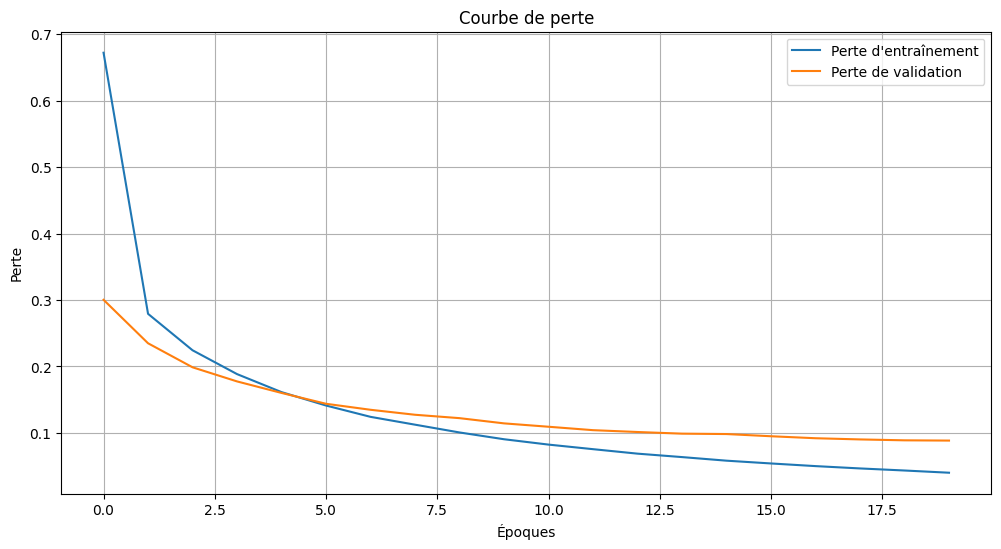

In [164]:
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))
plt.plot(mymodel.history['loss'], label='Perte d\'entraînement')
plt.plot(mymodel.history['val_loss'], label='Perte de validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()

### Modelisation : Deep Learning avec Convolution & Pooling

###### Convolution c'est un filtre qui va extraire des caractéristiques de l'image. Le pooling c'est une réduction de la taille de l'image pour réduire le nombre de paramètres et donc le temps d'entraînement.
###### Pooling permet de réduire la taille des images en conservant les caractéristiques les plus importantes. Cela permet de réduire le nombre de paramètres et donc le temps d'entraînement du modèle.

In [165]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Couche d'entrée
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),  # Couche de pooling pour réduire la taille des caractéristiques
    Flatten(),  # Aplatit les données
    Dense(128, activation='relu'),  # Couche dense avec 128 neurones et activation ReLU
    Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones et activation softmax
])

In [166]:
model.summary()  # Affiche le résumé du modèle

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)